In [1]:
from scipy.spatial.distance import euclidean
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import time
import json

# Import and clean the dataset

In [27]:
# import and clean the dataset
data_raw = pd.read_csv('data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150
data.dropna(inplace=True)
data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[50:], axis=1, inplace=True) # here 50 to remove the country

In [3]:
# Groups and Questions modify version
# (1) extraversion, (2) neuroticism, (3) agreeableness, (4)conscientiousness , and (5) openness
ext_questions = {'EXT1' : ['they are the life of the party',1],
                 'EXT2' : ['they dont talk a lot',-1],
                 'EXT3' : ['they feel comfortable around people',1],
                 'EXT4' : ['they keep in the background',-1],
                 'EXT5' : ['they start conversations',1],
                 'EXT6' : ['they have little to say',-1],
                 'EXT7' : ['they talk to a lot of different people at parties',1],
                 'EXT8' : ['they dont like to draw attention to themself',-1],
                 'EXT9' : ['they dont mind being the center of attention',1],
                 'EXT10': ['they are quiet around strangers',-1]}

est_questions = {'EST1' : ['they get stressed out easily',-1],
                 'EST2' : ['they are relaxed most of the time',1],
                 'EST3' : ['they worry about things',-1],
                 'EST4' : ['they seldom feel blue',1],
                 'EST5' : ['they are easily disturbed',-1],
                 'EST6' : ['they get upset easily',-1],
                 'EST7' : ['they change their mood a lot',-1],
                 'EST8' : ['they have frequent mood swings',-1],
                 'EST9' : ['they get irritated easily',-1],
                 'EST10': ['they often feel blue',-1]}

agr_questions = {'AGR1' : ['they feel little concern for others',-1],
                 'AGR2' : ['they interested in people',1],
                 'AGR3' : ['they insult people',-1],
                 'AGR4' : ['they sympathize with others feelings',1],
                 'AGR5' : ['they are not interested in other peoples problems',-1],
                 'AGR6' : ['they have a soft heart',1],
                 'AGR7' : ['they not really interested in others',-1],
                 'AGR8' : ['they take time out for others',1],
                 'AGR9' : ['they feel others emotions',1],
                 'AGR10': ['they make people feel at ease',1]}

csn_questions = {'CSN1' : ['they are always prepared',1],
                 'CSN2' : ['they leave their belongings around',-1],
                 'CSN3' : ['they pay attention to details',1],
                 'CSN4' : ['they make a mess of things',-1],
                 'CSN5' : ['they get chores done right away',1],
                 'CSN6' : ['they often forget to put things back in their proper place',-1],
                 'CSN7' : ['they like order',1],
                 'CSN8' : ['they shirk their duties',-1],
                 'CSN9' : ['they follow a schedule',1],
                 'CSN10' : ['they are exacting in their work',1]}

opn_questions = {'OPN1' : ['they have a rich vocabulary',1],
                 'OPN2' : ['they have difficulty understanding abstract ideas',-1],
                 'OPN3' : ['they have a vivid imagination',1],
                 'OPN4' : ['they are not interested in abstract ideas',-1],
                 'OPN5' : ['they have excellent ideas',1],
                 'OPN6' : ['they do not have a good imagination',-1],
                 'OPN7' : ['they are quick to understand things',1],
                 'OPN8' : ['they use difficult words',1],
                 'OPN9' : ['they spend time reflecting on things',1],
                 'OPN10': ['they are full of ideas',1]}

questions = ext_questions | est_questions | agr_questions | csn_questions  | opn_questions

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]


matching = EXT+EST+AGR+CSN+OPN

# PCA STUDY

In [ ]:
TO DO: 
    take the most import componant of the pca: the 5 first coef the 1 categ and the 5 lower coef (aka the questions) of 1 cate
    do the labelling automatically.

In [16]:
nb_components = 50

start_time = time.time()

#X = np.stack(data)
X = data.iloc[:,0:50]
#x_scaled = sklearn.preprocessing.StandardScaler().fit_transform(X) 
pca = PCA(n_components=nb_components)
#pca_features = pca.fit_transform(x_scaled)
pca_features = pca.fit_transform(X)

pca_df = pd.DataFrame(data=pca_features, 
columns=[f'PCA{i}' for i in range(1, nb_components+1)])  

#save the dataset 
#pca_df.to_pickle('C:../data_pca.pkl')
    

end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time, "seconds")

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [28]:
from sklearn.preprocessing import StandardScaler

X = np.stack(data)
X = data.iloc[:,0:10]

X_scaled = sklearn.preprocessing.StandardScaler().fit_transform(X) 
# Apply PCA and get the first 5 components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)


In [30]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:,0:10]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features
# Apply PCA and get the first 5 components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Access the explained variance ratio of the components
explained_variance = pca.explained_variance_ratio_

# Get the first 5 principal components
components = pca.components_



# Get the top 5 most important components (largest values in terms of absolute coefficient)
top_5_components = np.argsort(np.abs(components[0]))[-5:][::-1]  # Sorted by importance (highest first)

# Get the names of the features corresponding to the 5 highest coefficients
top_5_features = X.columns[top_5_components]
print("Top 5 most important features based on the first principal component:", top_5_features)


# Extract the indices of the first category (assuming y is categorical)
#first_category_indices = y == y.unique()[0]  # Get the first category's rows

# For simplicity, let's assume the "lower coefficients" are those that are closest to 0
# We will extract the 5 lowest (smallest) coefficients from the first principal component
#lowest_5_components = np.argsort(np.abs(components[0]))[:5]  # Sorted by smallest absolute values

# Get the features corresponding to the 5 smallest coefficients
#lowest_5_features = X.columns[lowest_5_components]
#print("5 lowest coefficients associated with the first category:", lowest_5_features)


Top 5 most important features based on the first principal component: Index(['EXT4', 'EXT7', 'EXT5', 'EXT2', 'EXT1'], dtype='object')


In [ ]:
# Assuming you want to label based on the first 5 components
# Create labels based on the proximity to the first principal component
df['pca_label'] = np.dot(X_scaled, components[0]) > 0  # Binary classification based on first component

print(df[['pca_label', 'category']].head())


In [5]:
num_clusters = 10

X = pca_df.loc[:,'PCA17':'PCA18'] #select all the PCA

#Initialize the class object

kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=50)

#predict the labels of clusters.
label = kmeans.fit_predict(X)
# adding a cluster column to the dataset
pca_df['Cluster']= label

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

C:\Users\amaca253\Anaconda3\envs\TBBT\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


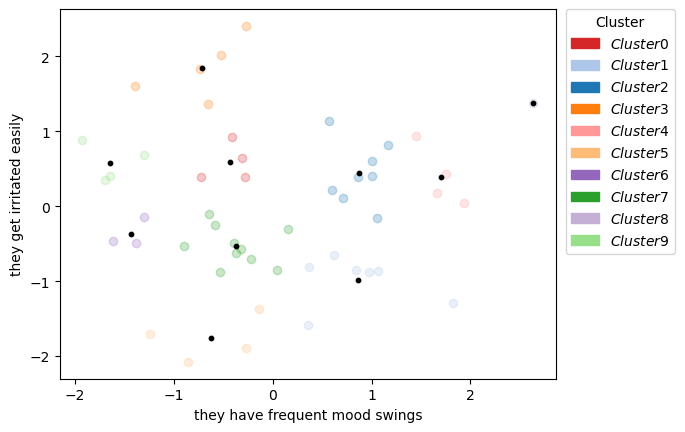

In [6]:
df2 = X.values
# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    closest_pt_idx.append(cluster_pts_indices[min_idx])



colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))



fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')

text = [f'Cluster {i}' for i in range(num_clusters)]
    
legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

plt.xlabel(questions[matching[17]][0]) # change here the correct PCA 
plt.ylabel(questions[matching[18]][0]) # change here the correct PCA
#plt.savefig('clusterprediction12.png',bbox_inches='tight')
plt.show()

## Finding the director vector

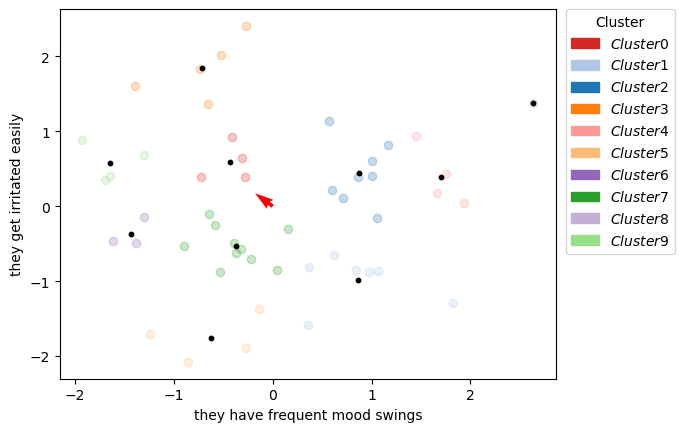

In [7]:
df2 = X.values
# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    closest_pt_idx.append(cluster_pts_indices[min_idx])



points = df2
pca2 = PCA(n_components=1)
pca2.fit(points)
# The vector representing the direction of the cloud
direction_vector = pca.components_[0]

colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))



fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')

mean_point = np.mean(points, axis=0)
plt.quiver(mean_point[0], mean_point[1], direction_vector[0], direction_vector[1],
           angles='xy', scale_units='xy', scale=1, color='red', label='Direction vector')

text = [f'Cluster {i}' for i in range(num_clusters)]
    
legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)


plt.xlabel(questions[matching[17]][0]) # change here the correct PCA 
plt.ylabel(questions[matching[18]][0]) # change here the correct PCA
#plt.savefig('clusterprediction12.png',bbox_inches='tight')
plt.show()



## Least Squares Fit

Slope: 3.165137581485916e-17
Intercept: 1.2226557145023198e-17


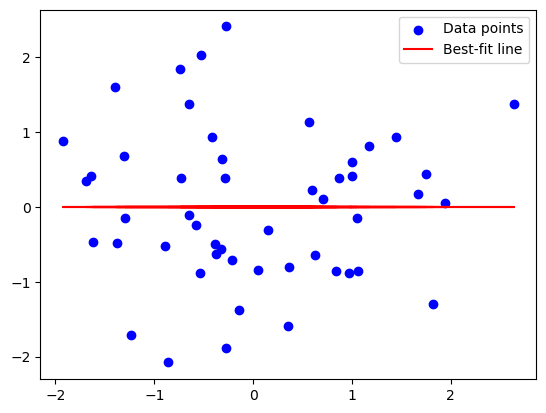

In [8]:
# Example cloud of points (each row is a point [x, y])
points = df2
# Separate the points into x and y components
x = points[:, 0]
y = points[:, 1]

# Perform least squares fit using numpy's polyfit (degree 1 for a line)
slope, intercept = np.polyfit(x, y, 1)

# Print the slope and intercept of the best-fit line
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Calculate the best-fit line values
y_fit = slope * x + intercept

# Plot the points and the best-fit line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_fit, color='red', label='Best-fit line')
plt.legend()
plt.show()


# Correlation

## From the dataset before the PCA

<Axes: >

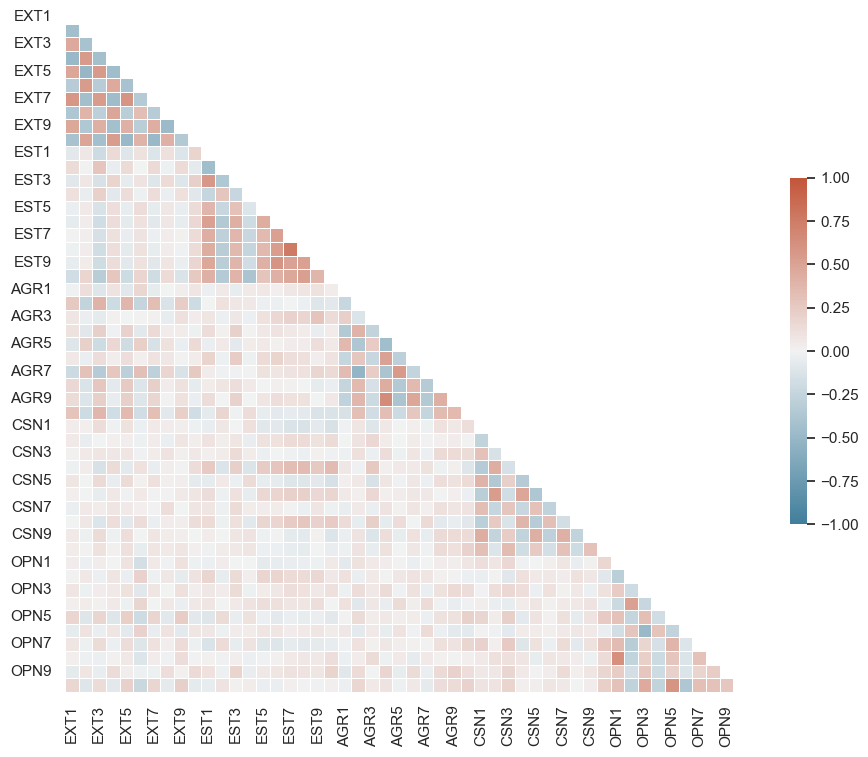

In [9]:
sns.set_theme(style="white")

# Generate a large random dataset

d = data

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1, square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig('50q_corr.png')

# The Big 5

In [10]:
# Here we update the dataframe by applying the new coefficient
for column in data.columns:
    data[column] = data[column] * questions[column][1]
    
data['extraversion'] = data.iloc[:, 0:10].sum(axis=1) + 20
data['neurotiscism'] = data.iloc[:, 10:20].sum(axis=1) +38
data['agreeableness'] = data.iloc[:, 20:30].sum(axis=1) +14 
data['conscientiousness'] = data.iloc[:, 30:40].sum(axis=1) + 14
data['openness'] = data.iloc[:, 40:50].sum(axis=1) + 8

In [11]:
nb_components = 5

start_time = time.time()

#X = np.stack(data)
X = data.iloc[:,-5:]
x_scaled = sklearn.preprocessing.StandardScaler().fit_transform(X)
pca = PCA(n_components=nb_components)
pca_features = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(data=pca_features, 
columns=[f'PCA{i}' for i in range(1, nb_components+1)])  

#save the dataset 
#pca_df.to_pickle('C:../data_300pca_TBBT.pkl')
    

end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time, "seconds")

Execution time: 0.37428832054138184 seconds


In [12]:
num_clusters = 10

X =pca_df.loc[:,['PCA1','PCA5']] #select all the PCA

#Initialize the class object

kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=50)

#predict the labels of clusters.
label = kmeans.fit_predict(X)
# adding a cluster column to the dataset
pca_df['Cluster']= label

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

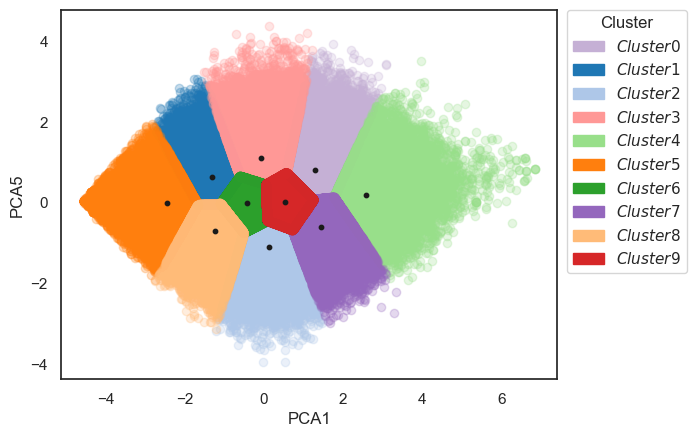

In [13]:
df2 = X.values
# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    closest_pt_idx.append(cluster_pts_indices[min_idx])




colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))



fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')

text = [f'Cluster {i}' for i in range(num_clusters)]
    
legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)


plt.xlabel('PCA1')
plt.ylabel('PCA5')
#plt.savefig('clusterprediction12.png',bbox_inches='tight')
plt.show()

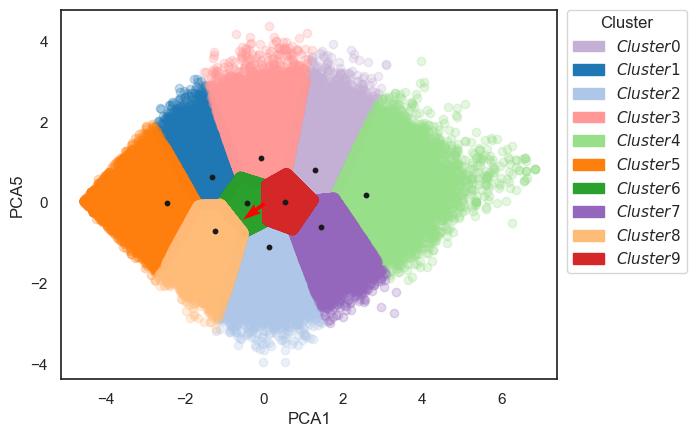

In [14]:
points = df2
pca2 = PCA(n_components=1)
pca2.fit(points)
# The vector representing the direction of the cloud
direction_vector = pca.components_[0]

colors = sns.color_palette('tab20', 10)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))



fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] ,color=ind_col_map[i],  label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')

mean_point = np.mean(points, axis=0)
plt.quiver(mean_point[0], mean_point[1], direction_vector[0], direction_vector[1],
           angles='xy', scale_units='xy', scale=1, color='red', label='Direction vector')

text = [f'Cluster {i}' for i in range(num_clusters)]
    
legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)


plt.xlabel('PCA1') # change here the correct PCA 
plt.ylabel('PCA5') # change here the correct PCA
plt.show()


Slope: -2.291925092163561e-13
Intercept: -3.3008021139106726e-16


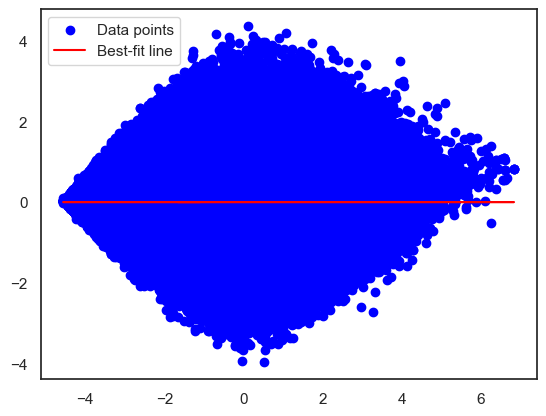

In [15]:
# Example cloud of points (each row is a point [x, y])
points = df2
# Separate the points into x and y components
x = points[:, 0]
y = points[:, 1]

# Perform least squares fit using numpy's polyfit (degree 1 for a line)
slope, intercept = np.polyfit(x, y, 1)

# Print the slope and intercept of the best-fit line
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Calculate the best-fit line values
y_fit = slope * x + intercept

# Plot the points and the best-fit line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_fit, color='red', label='Best-fit line')
plt.legend()
plt.show()

<Axes: >

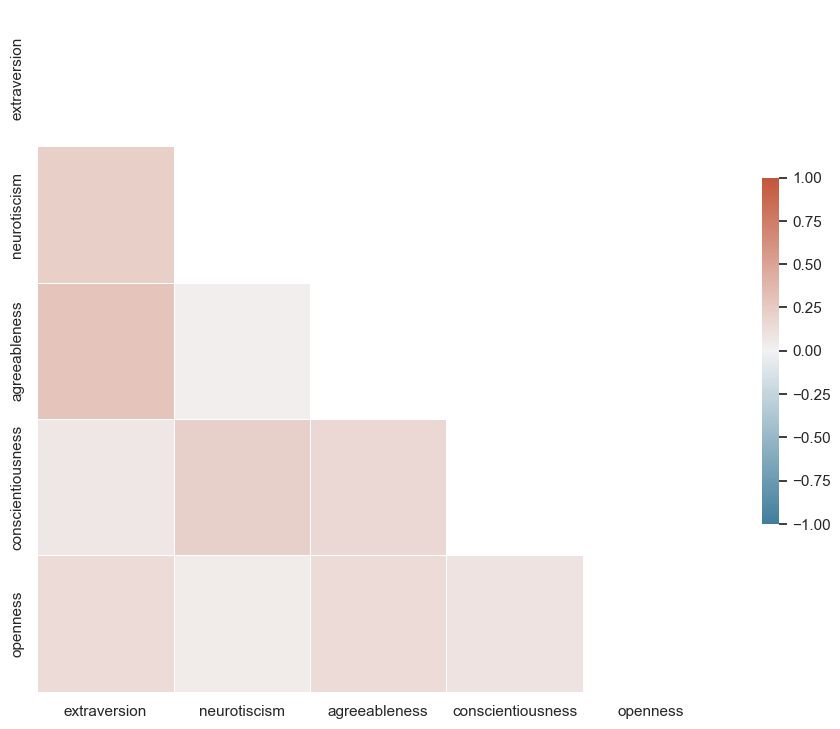

In [16]:
sns.set_theme(style="white")

# Generate a large random dataset

d = data.iloc[:,-5:]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1, square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig('50q_corr.png')